# Importing libraries and reading the data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


## Data Wrangling

In [7]:
df.shape

(48895, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here we have almost 48.8k rows with 16 columns for each. It is composed of 3 float types, 7 int types and 6 object types.

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


 From this we can see the mean price to be around 152 dollars.

 Average availablity of an airbnb around a year is 112 days.

In [11]:
df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

we have 5 locations in dataset and 3 room types.

In [12]:
df.duplicated().sum()

0

## Data Analysis and Visualization

### Host ID

In [13]:
df.host_id.value_counts().iloc[:5]

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

<Axes: >

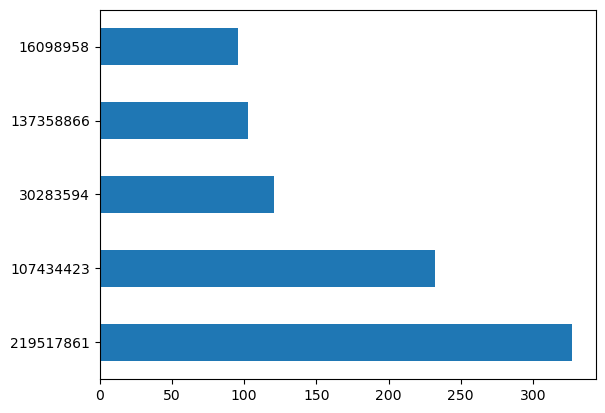

In [14]:
df.host_id.value_counts().iloc[:5].plot(kind = 'barh')

We can observe that the highest times transaction done by a customer is 327 in the year 2019.

### Room Type

In [15]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<Axes: ylabel='room_type'>

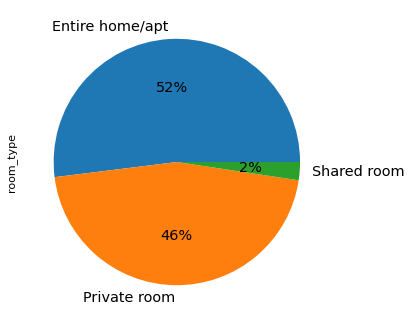

In [16]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

In our dataset, around 25k people (52%) choose to use a house while 22k(46%) for a private room. Only 1k(2%) people choose a shared room. This could mean more people who use airbnb , use it with family maybe for tours,visits,etc.

### Neighbourhood Groups - Location

In [17]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<Axes: ylabel='neighbourhood_group'>

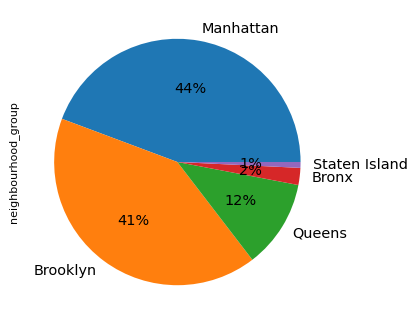

In [20]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

Manhattan is the city where most Airbnb transactions have occured with 44% of entire dataset. The least happend in Staten Island only 1%. Brooklyn consisted on 41% of transactions with 12% Queens and 2 % in Bronx.

### Neighbourhoods:

In [21]:
df['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [22]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

<Axes: ylabel='neighbourhood'>

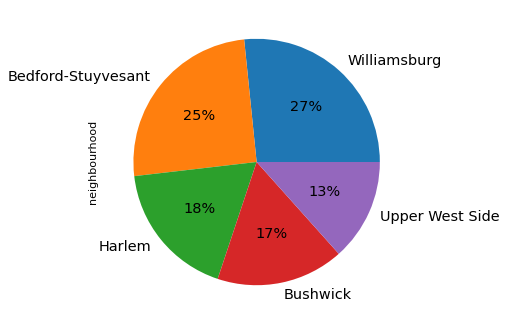

In [23]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

### Price:

In [24]:
df.price.value_counts().iloc[:10]

100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: price, dtype: int64

<Axes: >

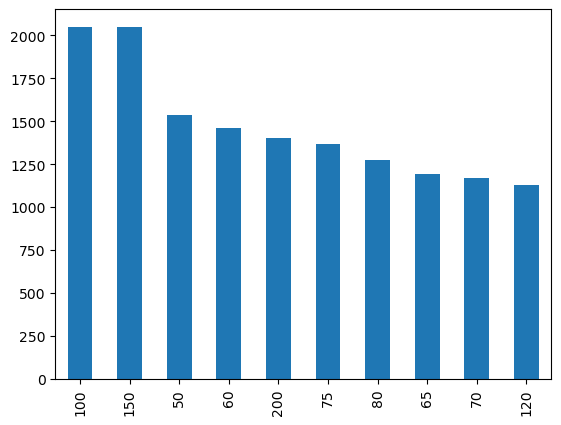

In [25]:
df.price.value_counts().iloc[:10].plot(kind = 'bar')

Almost 2k+ airbnb's has a price of 100 dollars and 150 dollars each respectively.

1.5k airbnb's have around 50 dollars price.

In [26]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The average pricing is around 152 dollars.

50% of data has price greater than 106 dollars.

The costliest airbnb has around 10k dollars as price.

In [27]:
df[df['price'] == 10000.000000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,13-02-2016,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,27-07-2017,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


We have 3 airbnbs with 10k per night luxury stay, one private room and 2 home stay.

### Minimum Nights:

In [28]:
df['minimum_nights'].value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

In [29]:
for i in range(1,11):
  print("Number of nights: ",i)
  print("Amount of trasactions:",len(df[df['minimum_nights'] == i]))

Number of nights:  1
Amount of trasactions: 12720
Number of nights:  2
Amount of trasactions: 11696
Number of nights:  3
Amount of trasactions: 7999
Number of nights:  4
Amount of trasactions: 3303
Number of nights:  5
Amount of trasactions: 3034
Number of nights:  6
Amount of trasactions: 752
Number of nights:  7
Amount of trasactions: 2058
Number of nights:  8
Amount of trasactions: 130
Number of nights:  9
Amount of trasactions: 80
Number of nights:  10
Amount of trasactions: 483


<Axes: >

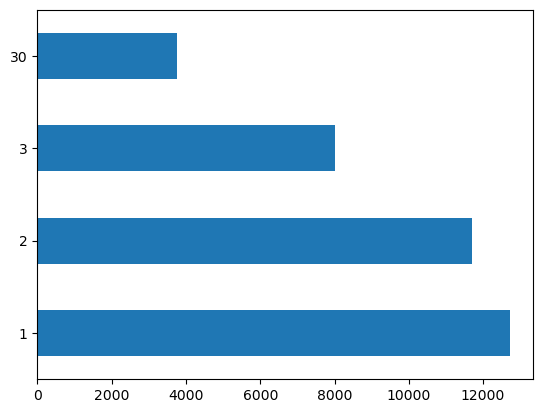

In [30]:
df['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh')

We can observe that most of almost 12k people used 1 night stay in airbnb.

11k people choose 2 night stay while 7k choose 3 night stay.

Almost 3.7k stayed upto a month.

### Number of reviews:

In [31]:
df['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

10k airbnbs dont have any reviews.

5.2k has around 1 review and the maximum number of reviews is 607 which only 1 airbnb.

In [32]:
df[df['number_of_reviews'] == 607]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,21-06-2019,7.75,3,293


Great Bedroom in Manhattan gets the highest reviews and it costs around 49 dollars.

### Availablity:

In [33]:
df['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

Around 1.3k airbnbs have 365 days availablity and rest doesnt.

In [34]:
df[df['availability_365'] == 365].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.295000e+03,1.295000e+03,1295.000000,1295.000000,1295.000000,1295.00000,1295.000000,841.000000,1295.000000,1295.0
mean,1.940195e+07,8.554698e+07,40.729014,-73.943275,250.769884,19.60000,10.220849,0.832545,13.158301,365.0
std,1.197265e+07,8.786960e+07,0.057781,0.059799,550.497373,65.05093,22.095983,1.112493,36.224171,0.0
min,2.539000e+03,2.787000e+03,40.507080,-74.242850,20.000000,1.00000,0.000000,0.010000,1.000000,365.0
25%,8.725256e+06,8.931349e+06,40.687990,-73.983210,72.000000,1.00000,0.000000,0.130000,1.000000,365.0
50%,2.065068e+07,4.634351e+07,40.730990,-73.954270,125.000000,3.00000,2.000000,0.410000,2.000000,365.0
75%,3.027040e+07,1.565055e+08,40.762095,-73.921715,225.000000,30.00000,10.000000,1.000000,7.000000,365.0
max,3.648315e+07,2.733930e+08,40.893740,-73.721730,9999.000000,1250.00000,183.000000,8.940000,327.000000,365.0


Costliest airbnb with 365 days availablity costs around 10k dollars with average of 250 dollars.

### Reviews per month:

In [36]:
df[df['reviews_per_month'] > 1].reviews_per_month.value_counts().sum()

15908

15.9k reviews were above 1.

In [37]:
df[df['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5]  

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

Above 1, around 406 airbnbs have 2 reviews per month, 222 with 3 and 130 with 4.

In [38]:
df['reviews_per_month'].max()

58.5

In [40]:
df[df['reviews_per_month'] == 58.5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,07-07-2019,58.5,9,299


Enjoy great views in Manhattan has the highest reviews per month. They offer Private room and is worth 100 dollars a night.

### Calculate host listing:

In [41]:
df.calculated_host_listings_count.value_counts().iloc[:5]

1    32303
2     6658
3     2853
4     1440
5      845
Name: calculated_host_listings_count, dtype: int64

<Axes: >

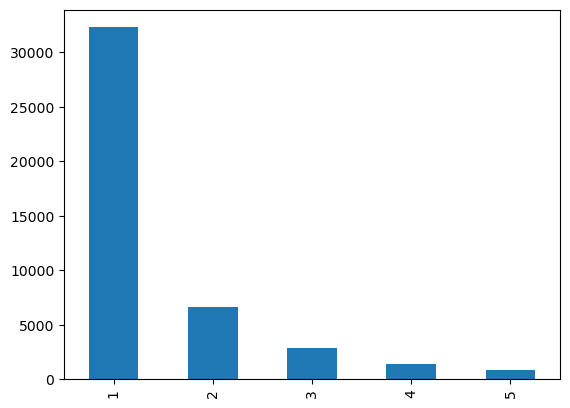

In [42]:
df.calculated_host_listings_count.value_counts().iloc[:5].plot(kind = 'bar')

Most hosts used the listings only once that is around 32.3k and 6.6k around 2 times.

In [43]:
df.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

On an average, a host has used listings 7 times.

Maximum times being 327.

## Bivariate Analysis

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4536\3337077561.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

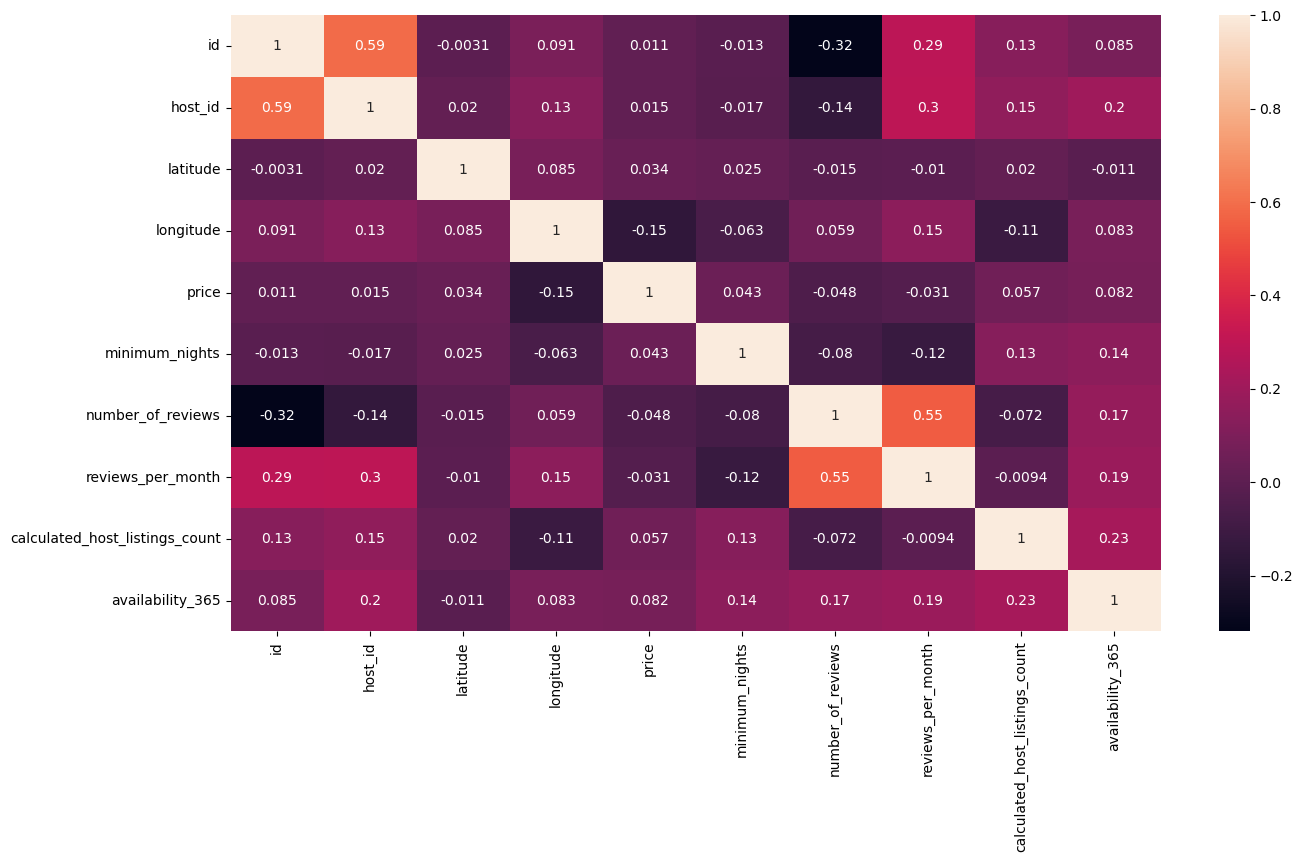

In [44]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

## Plots

<Axes: xlabel='room_type', ylabel='count'>

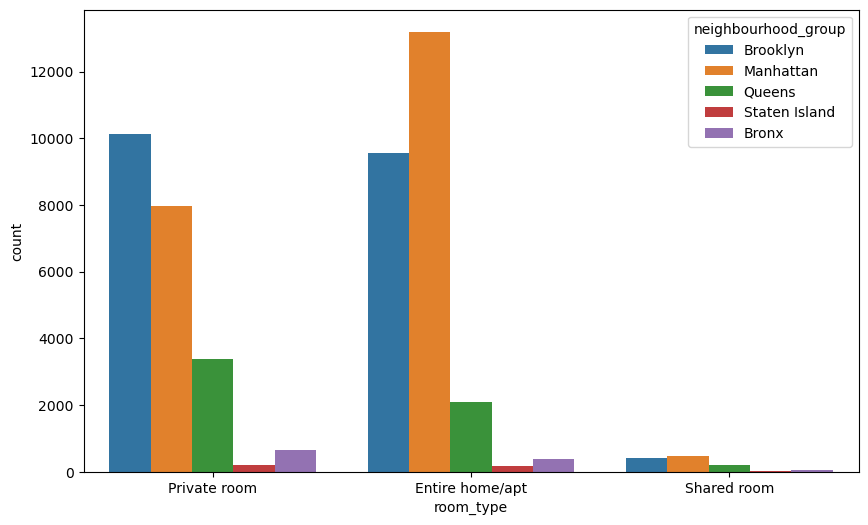

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'room_type', hue = 'neighbourhood_group')

Home service seems to be most used by people and the highest in Manhattan. This is also the highest service used across New York City.

In Brooklyn, Private rooms were more used.

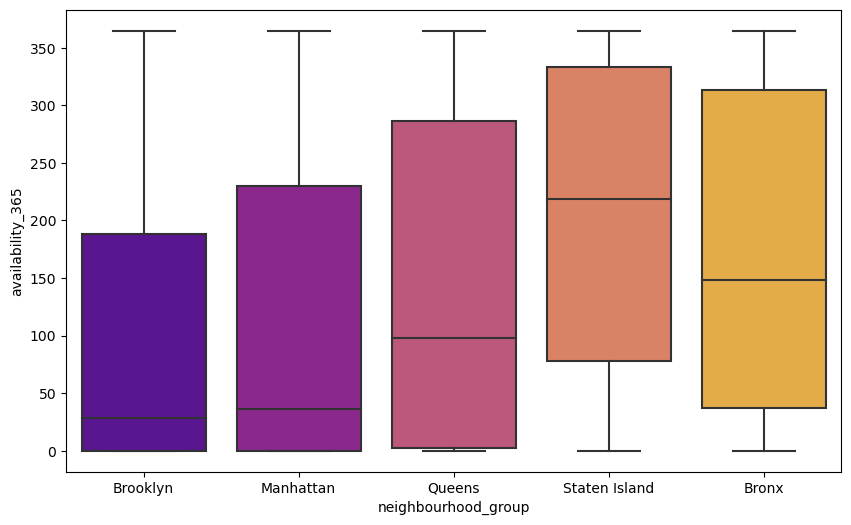

In [47]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

Staten Island has th highest average airbnb availablity.

In [48]:
df['neighbourhood'].value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

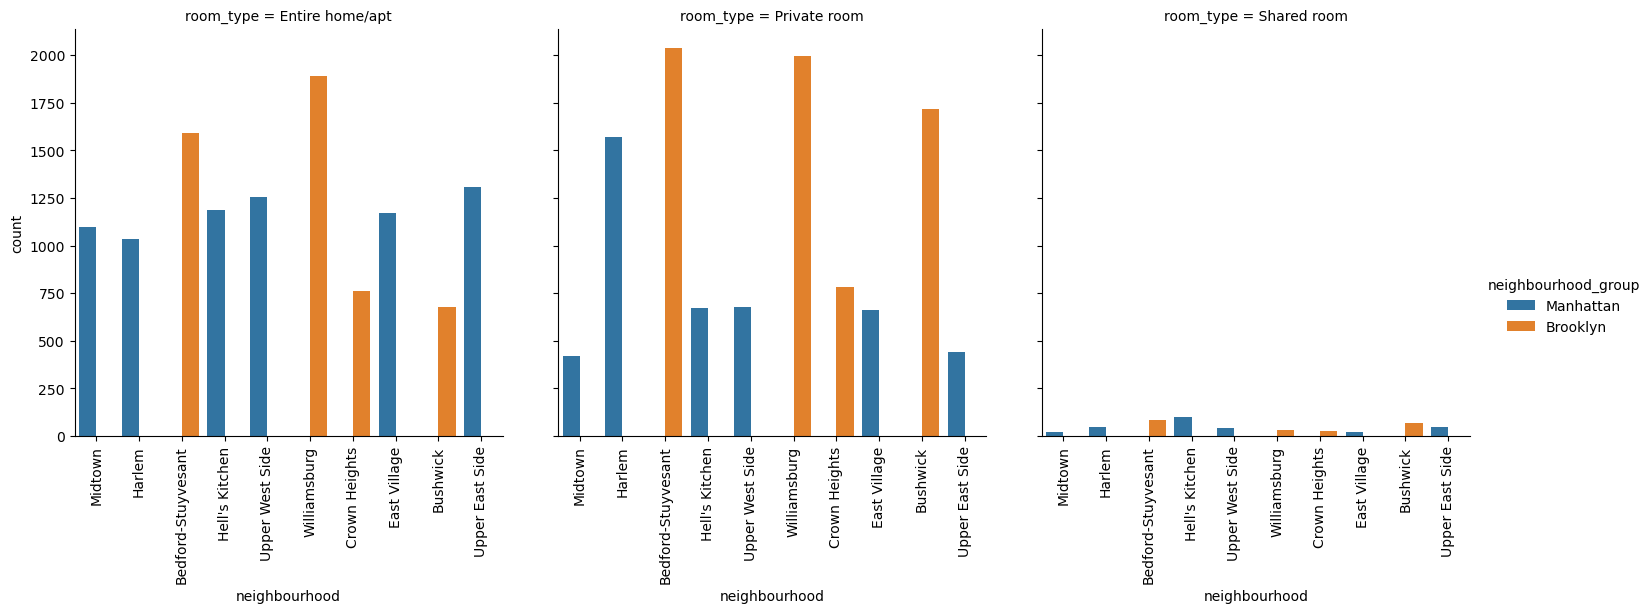

In [49]:
neighb =df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
pl =sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=neighb, kind='count')
pl.set_xticklabels(rotation=90)

<Axes: >

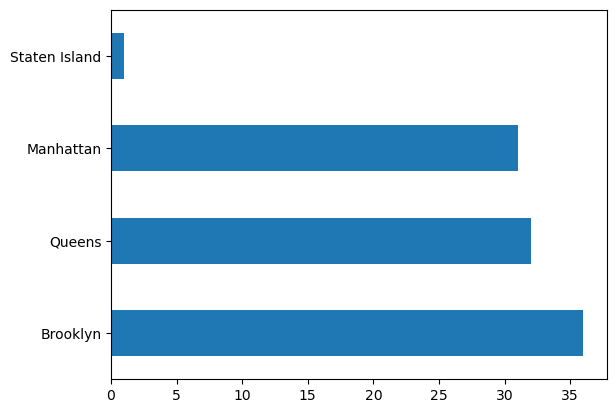

In [50]:
# Rooms with top 100 reviews by neighbourhood
dfr=df.sort_values(by=['number_of_reviews'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')

If we look at the top 100 airbnb's with number of reviews, Brooklyn has highest reviews followed by Queens and then Manhattan.

<Axes: >

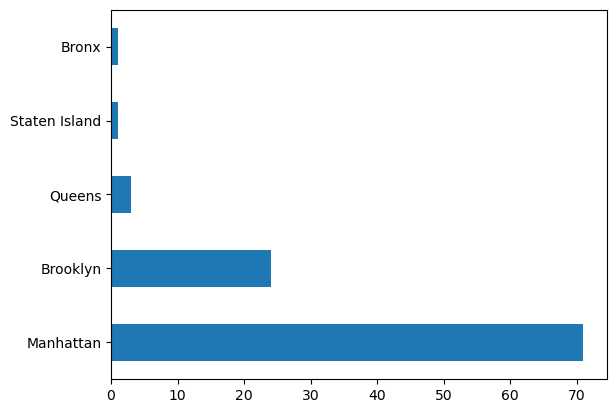

In [51]:
# Rooms with top 100 expensive by neighbourhood
dfr=df.sort_values(by=['price'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')

If we take the top 100 airbnbs then almost 70+ comes in Manhattan, followed by 25 in Brooklyn.

<Axes: >

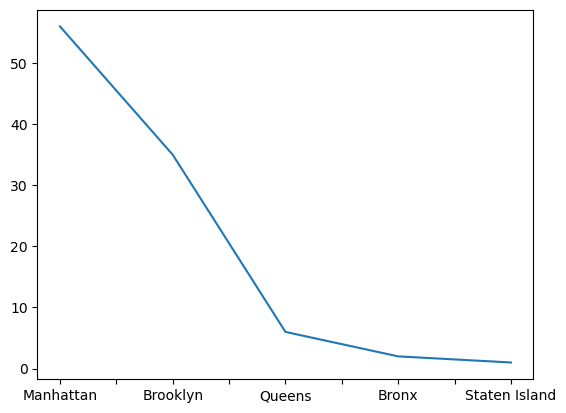

In [52]:
# Rooms with top 100 minimum_nights  by neighbourhood
dfr=df.sort_values(by=['minimum_nights'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot()

Manhattan has highest airbnbs with highest minimum nights.

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

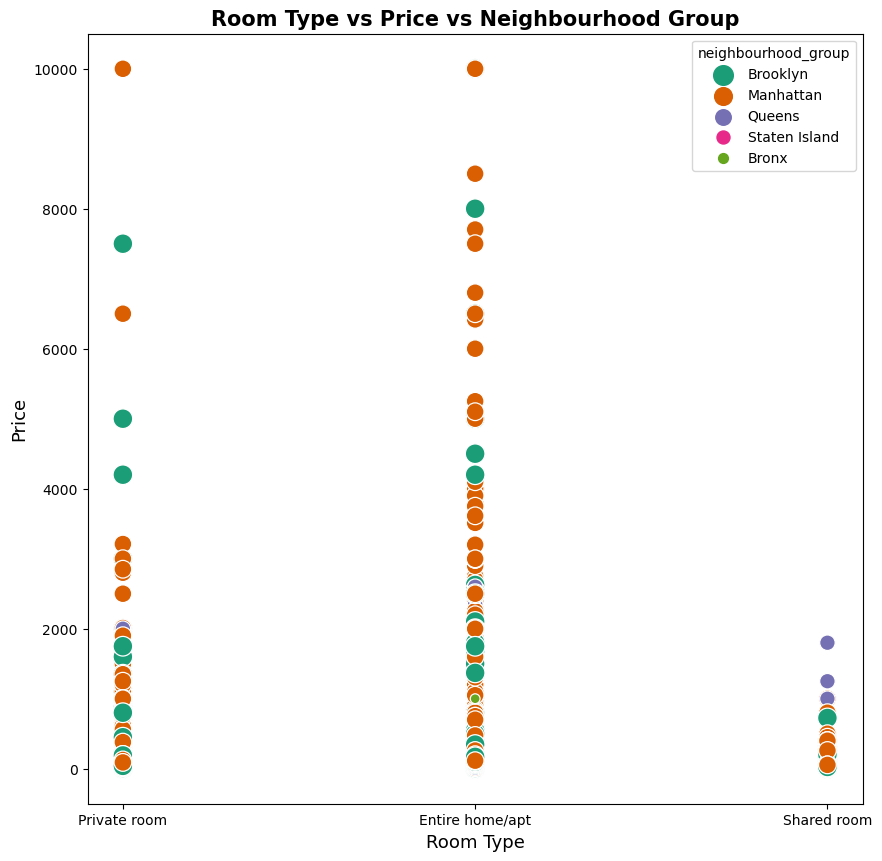

In [53]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')